# Dependency

In [ ]:
import os
import pandas as pd
import natsort
import holidays
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## 1, Read csv files
read csv files in DATA_PATH/.../... with the order of train, validation, and test dataset.

##### output
- - - - - - - -
**list_data_raw**: list [pd.Dataframe, pd.Dataframe, ..., pd.Dataframe]\
    &nbsp;&nbsp;&nbsp; raw data (dataframe read from csv file) is stored in list format\
**y**: list [int, int, ..., int]\
    &nbsp;&nbsp;&nbsp; 0 if UBE, 1 if UGE

In [ ]:

# dataset path
DATA_PATH   = "./DataSet"

# function to list all files in the path
paths = lambda x : [os.path.join(root, file) for root,dirs,files
                          in os.walk(DATA_PATH + "/" + x) for file in natsort.natsorted(files)]

# array to store all rawdata and y data
list_data_raw, y     = [], []
for _f_path in (paths("trainset") + paths("validationset") + paths("testset")):
    # gets raw data for current user csv and adds to list
    list_data_raw.append(pd.read_csv(_f_path))
    # gets y variable from file path (UBE:0, UGE:1)
    y.append(1 if("UGE" in _f_path) else 0)

In [36]:
# an example of input data (user1 of UBE)
list_data_raw[0]

day  hour         specifictime  indicator1  indicator2  \
0     2021-06-10    18  2021-06-10 18:09:59       45.00       36.00   
1     2021-06-10    18  2021-06-10 18:09:59       33.00        3.00   
2     2021-06-10    18  2021-06-10 18:09:59       24.00        2.00   
3     2021-06-10    18  2021-06-10 18:09:59        5.00        1.00   
4     2021-06-10    18  2021-06-10 18:09:59        5.00        3.00   
...          ...   ...                  ...         ...         ...   
9490  2021-06-16    23  2021-06-16 23:59:59       15.33        3.67   
9491  2021-06-16    23  2021-06-16 23:59:59       12.11       25.00   
9492  2021-06-16    23  2021-06-16 23:59:59       22.00        5.00   
9493  2021-06-16    23  2021-06-16 23:59:59       24.50        9.00   
9494  2021-06-16    23  2021-06-16 23:59:59        0.00        0.00   

      indicator3  indicator4  indicator5  indicator6  indicator7  indicator8  
0           3.00       45.00       229.0        45.0      0.2000      0.0000  
1           0.00       33.00         2.0        33.0      0.0000      0.0000  
2           5.00       24.00         2.0        24.0      0.0000      0.0000  
3           2.00       25.50       300.0        18.0      0.3404      0.1429  
4           5.00        5.00         2.0         5.0      0.0000      0.2400  
...          ...         ...         ...         ...         ...         ...  
9490        6.67       15.67        10.0         7.0      0.0116      0.0093  
9491       27.00       11.44        20.0        14.0      0.0055      0.0062  
9492      123.00       22.00        24.0        23.0      0.0714      0.0000  
9493        6.50       18.75         6.0        24.0      0.0000      0.0000  
9494        0.00       15.50         0.0         0.0      0.0000      0.0000  

[9495 rows x 11 columns]

In [37]:
# labels
print(' '.join(map(str, y)))

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


## 2, Feature extraction
Extract features (number of dimension: 36) from each raw data.\
Pre-process and extract features based on insights from data networking protocols as well as an accurate histogram analysis, then this method is called "Histogram-Based Feature Selection Method".

##### output
- - - - - - - -
**X**: pd.Dataframe

| column        |type       | description               |
| ------------- |:---------:| -------------------------:|
| f_N (N=00~35) | float     | feature value             |

In [ ]:


china_holidays = holidays.China()
list_chi_holiday = {'2021-06-10': False, '2021-06-11': False, '2021-06-12': True, '2021-06-13': True, '2021-06-14': True, '2021-06-15': False, '2021-06-16': False}
def check_holiday(date):
    """
    Parameters (input data needed)
    ---------------- 
    date: string
        date with format "YYYY-MM-DD"

    Returns
    ---------------- 
    chinese_holiday.is_holiday(date): bool
        True if input date is weekend
        False if input date is midweek
    
    Notes
    ----------------
    Check the date input is holiday or not with chinese_holiday library.
    This function saves the holidays to the dictionary (list_chi_holiday).
    """
    if date not in list_chi_holiday.keys():
        # this date is input at the first time
        list_chi_holiday[date] = (date in china_holidays)
    return list_chi_holiday[date]  # True(weekend), False(midweek)

# definition of outlier ([outlier of indicator1, 2 , ... , 8])
OUTLIER = [48.75, 101.5, 19.1, 50.5, 128, 47.5, 0.184629, 0.212225]

# dataframe to store features of each data
_columns_X = ["f_"+format(i,"02") for i in range(36)]
X = pd.DataFrame(columns=_columns_X)

# repititive loop of data for extracting features
for _user_idx, data_raw in enumerate(list_data_raw):
    
    # data cleaning (number of dimension at output: 8)
    data_clean  = data_raw[(data_raw["indicator1"] > 0) & (data_raw["indicator2"] > 0) &
                           (data_raw["indicator4"] > 0) & (data_raw["indicator5"] > 0) &
                           (data_raw["indicator6"] > 0)] # remove data if either indicator 1/2/4/5/6 is zero
    for _j in range(8):
        # replace data exceding outlier for the outlier value
        data_clean.loc[data_clean["indicator" + str(_j+1)] > OUTLIER[_j], "indicator" + str(_j+1)] = OUTLIER[_j]
    
    # indicator grouping + averaging (number of dimension at output: 4)
    data_group = data_clean[["day", "hour"]]
    data_group = data_group.assign(WAN_RTT  = data_clean[["indicator1","indicator4","indicator6"]].mean(axis=1))
    data_group = data_group.assign(LAN_RTT  = data_clean[["indicator2","indicator5"]].mean(axis=1))
    data_group = data_group.assign(LAN_RES  = data_clean["indicator3"])
    data_group = data_group.assign(RET      = data_clean[["indicator7","indicator8"]].mean(axis=1))
    
    # definition of histogram-based indicator splitting
    list_group_range = [] # definition of group range (R1 ~ R6)
    list_group_range.append(["LAN_RTT",  ((data_group["LAN_RTT"] > 0)    & (data_group["LAN_RTT"] < 23))])
    list_group_range.append(["LAN_RTT",  ((data_group["LAN_RTT"] >= 23)  & (data_group["LAN_RTT"] < 60))])
    list_group_range.append(["LAN_RES",  ((data_group["LAN_RES"] >= 0)   & (data_group["LAN_RES"] < 19))])
    list_group_range.append(["WAN_RTT",  ((data_group["WAN_RTT"] > 0)    & (data_group["WAN_RTT"] < 19))])
    list_group_range.append(["WAN_RTT",  ((data_group["WAN_RTT"] >= 19)  & (data_group["WAN_RTT"] < 39))])
    list_group_range.append(["RET",      ((data_group["RET"]     >= 0)   & (data_group["RET"]     < 0.18))])
    # definition of temporal sample splitting
    list_time_range = [] # definition of time range (T1 ~ T3)
    list_time_range.append((data_group["hour"] >= 0)     & (data_group["hour"] < 7))
    list_time_range.append((data_group["hour"] >= 7)     & (data_group["hour"] < 19))
    list_time_range.append((data_group["hour"] >= 19)    & (data_group["hour"] < 24))
    list_date_range = [] # definition of date range (D1 ~ D2)
    list_date_range.append(data_clean["day"].apply(lambda x: check_holiday(x)) == True)
    list_date_range.append(data_clean["day"].apply(lambda x: check_holiday(x)) == False)
    
    # histogram-based indicator splitting + temporal sample splitting (number of dimension at output: 36)
    data_split = [] # temporal list to store features 
    for _date_range in list_date_range:
        # sample splitting with date
        for _time_range in list_time_range:
            # sample splitting with time
            for _group_range in list_group_range:
                # histogram-based indicator splitting
                
                # Temporal mean value with normalization 
                _Norm_val = max(OUTLIER[6:8]) if _group_range[0] == "RET" else max(OUTLIER[0:6])
                data_split.append(data_group[_group_range[0]][_group_range[1] & _time_range & _date_range].mean(axis=0) / _Norm_val
                                  if (sum(_group_range[1] & _time_range & _date_range) > 0) else 0) 
    
    # store features to X
    X = pd.concat([X, pd.DataFrame([data_split], columns=_columns_X, index = [_user_idx+1])])

In [39]:
# features table (dimension: 36)
X

f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
1    0.084179  0.295864  0.042644  0.082786  0.197693  0.071928  0.081747   
2    0.074255  0.285576  0.033693  0.077102  0.195812  0.065633  0.059618   
3    0.084629  0.303670  0.039559  0.084508  0.203009  0.025416  0.086439   
4    0.081984  0.306749  0.057647  0.079210  0.207192  0.103840  0.070810   
5    0.066158  0.400596  0.050235  0.087643  0.218689  0.174248  0.066764   
..        ...       ...       ...       ...       ...       ...       ...   
496  0.065684  0.331129  0.032424  0.086648  0.201539  0.052793  0.140952   
497  0.075787  0.282016  0.027849  0.086277  0.191331  0.029836  0.067643   
498  0.060370  0.357822  0.045292  0.074669  0.195266  0.121844  0.055614   
499  0.131995  0.274901  0.023212  0.061377  0.210305  0.007975  0.140863   
500  0.089489  0.341245  0.049121  0.090358  0.208713  0.122932  0.078975   

         f_07      f_08      f_09  ...      f_26      f_27      f_28  \
1    0.331690  0.046552  0.087150  ...  0.031234  0.083050  0.209908   
2    0.281459  0.033251  0.080656  ...  0.033441  0.079302  0.202995   
3    0.298045  0.036924  0.078015  ...  0.039487  0.081294  0.203608   
4    0.327927  0.052282  0.082227  ...  0.041342  0.080849  0.208708   
5    0.331570  0.035425  0.084544  ...  0.039950  0.085495  0.211541   
..        ...       ...       ...  ...       ...       ...       ...   
496  0.318939  0.033494  0.086606  ...  0.027422  0.067432  0.201625   
497  0.293731  0.025818  0.084087  ...  0.032709  0.083412  0.193642   
498  0.323520  0.042283  0.071397  ...  0.041688  0.070512  0.202101   
499  0.275197  0.017078  0.057989  ...  0.018418  0.056173  0.212366   
500  0.323108  0.039456  0.082174  ...  0.046502  0.082724  0.212124   

         f_29      f_30      f_31      f_32      f_33      f_34      f_35  
1    0.102280  0.085309  0.325451  0.045230  0.091154  0.201221  0.108005  
2    0.054084  0.064287  0.283163  0.036156  0.092695  0.213434  0.061198  
3    0.026739  0.085377  0.287670  0.035250  0.083466  0.204464  0.024723  
4    0.093763  0.084030  0.320133  0.056008  0.081828  0.207380  0.103358  
5    0.087733  0.072108  0.356918  0.043809  0.087445  0.216348  0.112164  
..        ...       ...       ...       ...       ...       ...       ...  
496  0.080420  0.149247  0.335381  0.036678  0.092964  0.200622  0.054021  
497  0.034385  0.068157  0.282500  0.027108  0.085791  0.195477  0.027344  
498  0.076955  0.054393  0.318106  0.040893  0.072987  0.197758  0.048949  
499  0.023791  0.139036  0.275904  0.016876  0.059011  0.216358  0.017060  
500  0.096615  0.070200  0.359567  0.046874  0.077824  0.210199  0.072328  

[500 rows x 36 columns]

## 3, Classifier model training
Random Forest classifier learning with train dataset.\
Input data and labals are transformed into numpy format for applying grouped permutation importance study later.

##### output
- - - - - - - -
**clf**: RandomForestClassifier\
    &nbsp;&nbsp;&nbsp; trained classifier model\
**X_train, X_val, X_test**: np.array([300, 36]), np.array([100, 36]), np.array([100, 36])\
    &nbsp;&nbsp;&nbsp; features table of train, validation, and test data set with numpy format\
**y_train, y_val, y_test**: np.array([300]), np.array([100]), np.array([100])\
    &nbsp;&nbsp;&nbsp; labels of train, validation, and test data set with numpy format

In [ ]:

# devide features and label into train, validationset, and test set
# transform those into numpy format for applying grouped permutation importance study later
X_train, y_train    = X.iloc[:300].to_numpy(),     np.array(y[:300])
X_val,   y_val      = X.iloc[300:400].to_numpy(),  np.array(y[300:400])
X_test,  y_test     = X.iloc[400:500].to_numpy(),  np.array(y[400:500])

# Random Forest model training
clf = RandomForestClassifier(max_depth=10, n_estimators=5, max_features='log2', random_state=71666)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=5,
                       random_state=71666)

## 4, Classifier model save & load (if needed)
Save & load the classifier model. This section is commented out by default.

In [41]:
# # import required modules to save & load the model
# import pickle

# # save model
# _model = open('model.pkl', 'wb')
# pickle.dump(clf, _model)
# _model.close()

# # load model
# _model = open('model.pkl', 'rb')
# clf = pickle.load(_model)
# _model.close()

## 5, Classifier model test
Random Forest classifier predicting with test dataset.

In [42]:
# predict UBE or UGE of test set
y_test_predict = clf.predict(X_test)
print(y_test)
print(y_test_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]


In [ ]:

# classification report (e.g. accuracy, F1 score)
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        50
           1       0.78      0.78      0.78        50

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



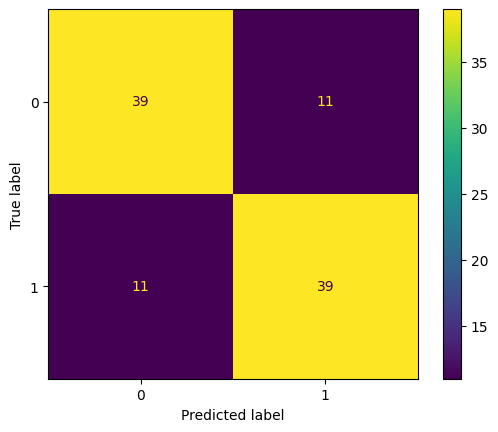

In [44]:
# confusion matrix report
cm      = confusion_matrix(y_test, y_test_predict, labels=clf.classes_)
disp    = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()